In [10]:
%load_ext autoreload
%autoreload 2

# Funkcje kary - zewnętrzne, wewnętrze i hybrydowe

#### Celem funkcji kary jest zredukowanie problemu ZNP z ograniczeniami do problemu bez ograniczeń i zastosowanie znanych algorytmów optymalizacji. Mając ZNP zdefiniowane w ten sposób:

\begin{equation}
    \begin{cases}
        \large \underset{x}{\text{minimize}}\, f(x)\\
        \large h_{i}(x)=0,\ i = 1, \ldots, p\\
        \large g_{j}(x)\leq 0,\ j = 1, \ldots, r\\
        \large x\in\mathbb{R}^n
    \end{cases}
    \tag{1}
\end{equation}

#### Przy czym $\small f,h_{i},g_{j}:\mathbb{R}^n \rightarrow \mathbb{R},\ n \geq 1$


#### Definiujemy wersję bez ograniczeń:

\begin{equation}
    \begin{cases}
        \large \underset{x}{\text{minimize}}\, F(x)\\
        \large x\in\mathbb{R}^n
    \end{cases}
    \tag{2}
\end{equation}

#### gdzie:

$$\large F(x) = f(x) + B(x)$$
$$\large B(x) = \rho_{1}\sum_{j=1}^{p} \mu(h_j(x)) + \rho_{2}\sum_{i=1}^{r} \psi(g_i(x))$$

#### $\mu$ i $\psi$ to funkcje kary odpowiednio dla ograniczeń zadanych równościami i nierównościami. $\\ \rho_{1},\ \rho_{2}$ to dodatnie współczynniki, który staramy się dobrać tak aby proces poszukiwania rozwiązania był efektywny. Częstą praktyką jest zdefiniowanie jednego współczynnika, który skaluje karę z obu członów.

# Zewnętrzna funkcja kary (Exterior penalty function method)
#### Metody funkcji kary zewnętrznej zmieniają problem z ograniczeniami na pojedyńczy problem bez ograniczeń lub na sekwencję takich problemów. Metoda ta będzie "karać" rozwiązania nie spełniające przyjętych ograniczeń. Istotną rzeczą jest odpowiednie dobranie współczynnika kary (penalty factor)

\begin{equation}
    \begin{cases}
        \large \underset{x}{\text{minimize}}\, f(x) + \rho B(x)\\
        \large x\in\mathbb{R}^n
    \end{cases}
    \tag{3}
\end{equation}

#### gdzie:
$$\large B(x) = \sum_{j=1}^{p} \lVert h_j(x) \rVert^{q} + \rho_{2}\sum_{i=1}^{r} \lVert \max \{0, g_{j}(x)\} \rVert^{q}$$
$$\rho > 0$$
$$q \geq 0$$
$$f,h_{i},g_{j}\in C^{0}(\mathbb{R}^n)$$



# Intuicja dla ograniczeń zadanych przez nierówność

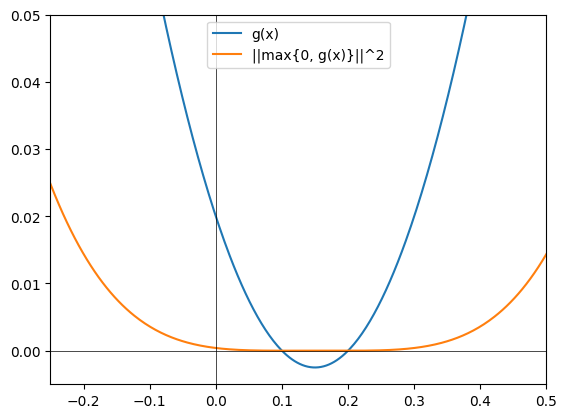

In [15]:
from demos import show_max_penalty_function
show_max_penalty_function()

# Intuicja dla metody 

##### Weźmy prosty przykład dla funkcji jednej zmiennej:

\begin{equation}
    \begin{cases}
        \large \underset{x}{\text{minimize}}\, x^2-10x\\
        \large x-3 \leq 0\\
        \large x\in\mathbb{R}
    \end{cases}
    \tag{4}
\end{equation}


##### Po redukcji do problemu bez ograniczeń:

\begin{equation}
    \begin{cases}
        \large \underset{x}{\text{minimize}}\, (x^2-10x) + \rho ( \max \{0, x-3\} )^{2}\\
        \large x\in\mathbb{R}
    \end{cases}
    \tag{5}
\end{equation}




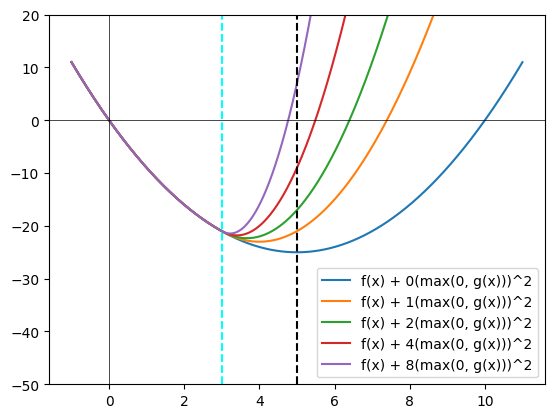

In [16]:
from demos import show_external_penalty_function_method
show_external_penalty_function_method()

# Algorytm dla metody zewnętrznej funkcji kary
#### Po redukcji problemu do wersji bez ograniczeń jesteśmy w stanie zastosować dowolny algorytm optymalizacji dla którego nasza finalna funkcja spełnia jego założenia. Przykładowo może to być metoda siecznych.

## Pseudokod:


### Uwaga: Dobrze jest przeskalować wszystkie warunki tak żeby ich wartości były podobnego rzędu. Powinno to pomóc w tym żeby optymalizacja traktowała sprawiedliwie wszystkie zadane ograniczenia. Jeśli się tego nie zagwarantuje, algorytm może pójść w kierunku przestrzeni gdzie spełnione są ograniczenia zadane przez dominujące funkcje.

#### Niech: $\\ \ \epsilon > 0$ - warunek stopu, $\\ \ x_{1}$ - punkt startowy (niespełniający chociaż jednego warunku), $\\ \ \rho_{1}$ - początkowy wspołczynnik przy funkcji kary, $\\ \ c > 1$ - stała skalująca kolejne $\rho_{k}$

#### $k=1$
#### 1. Zaczynając w $x_{k}$ zastosować algorytm optymalizacji do:

\begin{equation}
    \begin{cases}
        \large \underset{x}{\text{minimize}}\, f(x) + \rho_{k} B(x)\\
        \large x\in\mathbb{R}^n
    \end{cases}
    \tag{6}
\end{equation}

#### 2. Niech $x_{k+1}$ to optymalne rozwiązanie otrzymane z algorytmu
#### 3. Jeśli $B(x_{k+1}) < \epsilon$ to kończymy poszukiwanie rozwiązania. W innym wypadku $\rho_{k+1}:=c \rho_{k}$ oraz $k:= k+1$ i wracamy do punktu $1$

# Własności algorytmu
#### Przy przyjętych założeniach algorytmu zachodzą następujące warunki:

#### 1. $\lim_{k \to \infty} \rho_{k} = \infty$
#### 2. $f(x_{k}) + \rho_{k} B(x_{k}) \leq f(x_{k+1}) + \rho_{k+1} B(x_{k+1})$
#### 3. $B(x_{k}) \geq B(x_{k+1})$
#### 4. $f(x_{k}) \leq f(x_{k+1})$ 

## Dowody:

#### 1. Pierwszy fakt jest trywialny i wynika z faktu, że wyliczamy $\rho_{k+1} := c\rho_{k}$, skoro $c>1$ to $\lim_{k \to \infty} \rho_{k} = \lim_{k \to \infty} c^{k-1}\rho_{1} = \infty$

#### 2. W drugiej właśności korzystamy z faktu, że $0 < \rho_{k} < \rho_{k+1}$ więc $\rho_{k}B(x_{k+1}) \leq \rho_{k+1}B(x_{k+1})$ 
#### Skoro $x_{k}$ minimalizuje $f(x) + \rho_{k}B(x)$ to mamy:

\begin{equation}
    \ f(x_{k}) + \rho_{k}B(x_{k}) \leq f(x_{k+1}) + \rho_{k}B(x_{k+1}) \leq f(x_{k+1}) + \rho_{k+1}B(x_{k+1})
\end{equation}

#### Zatem $f(x_{k}) + \rho_{k} B(x_{k}) \leq f(x_{k+1}) + \rho_{k+1} B(x_{k+1})$ 

#### 3. $x_{k+1}$ minimalizuje $f(x_{k+1}) + \rho_{k+1} B(x_{k+1})$ co daje:

\begin{equation}
    \ f(x_{k+1}) + \rho_{k+1} B(x_{k+1}) \leq f(x_{k}) + \rho_{k+1} B(x_{k})
\end{equation}

#### Podobnie dla $x_{k}$ otrzymujemy:

\begin{equation}
    \ f(x_{k}) + \rho_{k} B(x_{k}) \leq f(x_{k+1}) + \rho_{k} B(x_{k+1})
\end{equation}


#### Dodając obie nierówności otrzymujemy:

\begin{equation}
    \ (\rho_{k+1} - \rho_{k})(B(x_{k}) - B(x_{k+1})) \geq 0
\end{equation}

\begin{equation}
    \ B(x_{k}) \geq B(x_{k+1})
\end{equation}

#### 4. Z nierówności użytej we właśności 2 mamy:

\begin{equation}
    \ f(x_{k}) - f(x_{k+1}) \leq \rho_{k}(B(x_{k+1}) - B(x_{k}))
\end{equation}

#### Skoro $B(x_{k+1}) - B(x_{k}) \leq 0$ i $\rho_{k} > 0$ mamy:

\begin{equation}
    \ f(x_{k}) - f(x_{k+1}) \leq 0
\end{equation}

### Co więcej da się udowodnić, że dowolny punkt skupienia ciągu ${x_{k}}$ jest rozwiązaniem pierwotnego problemu z ograniczeniami

# Przykład działania algorytmu

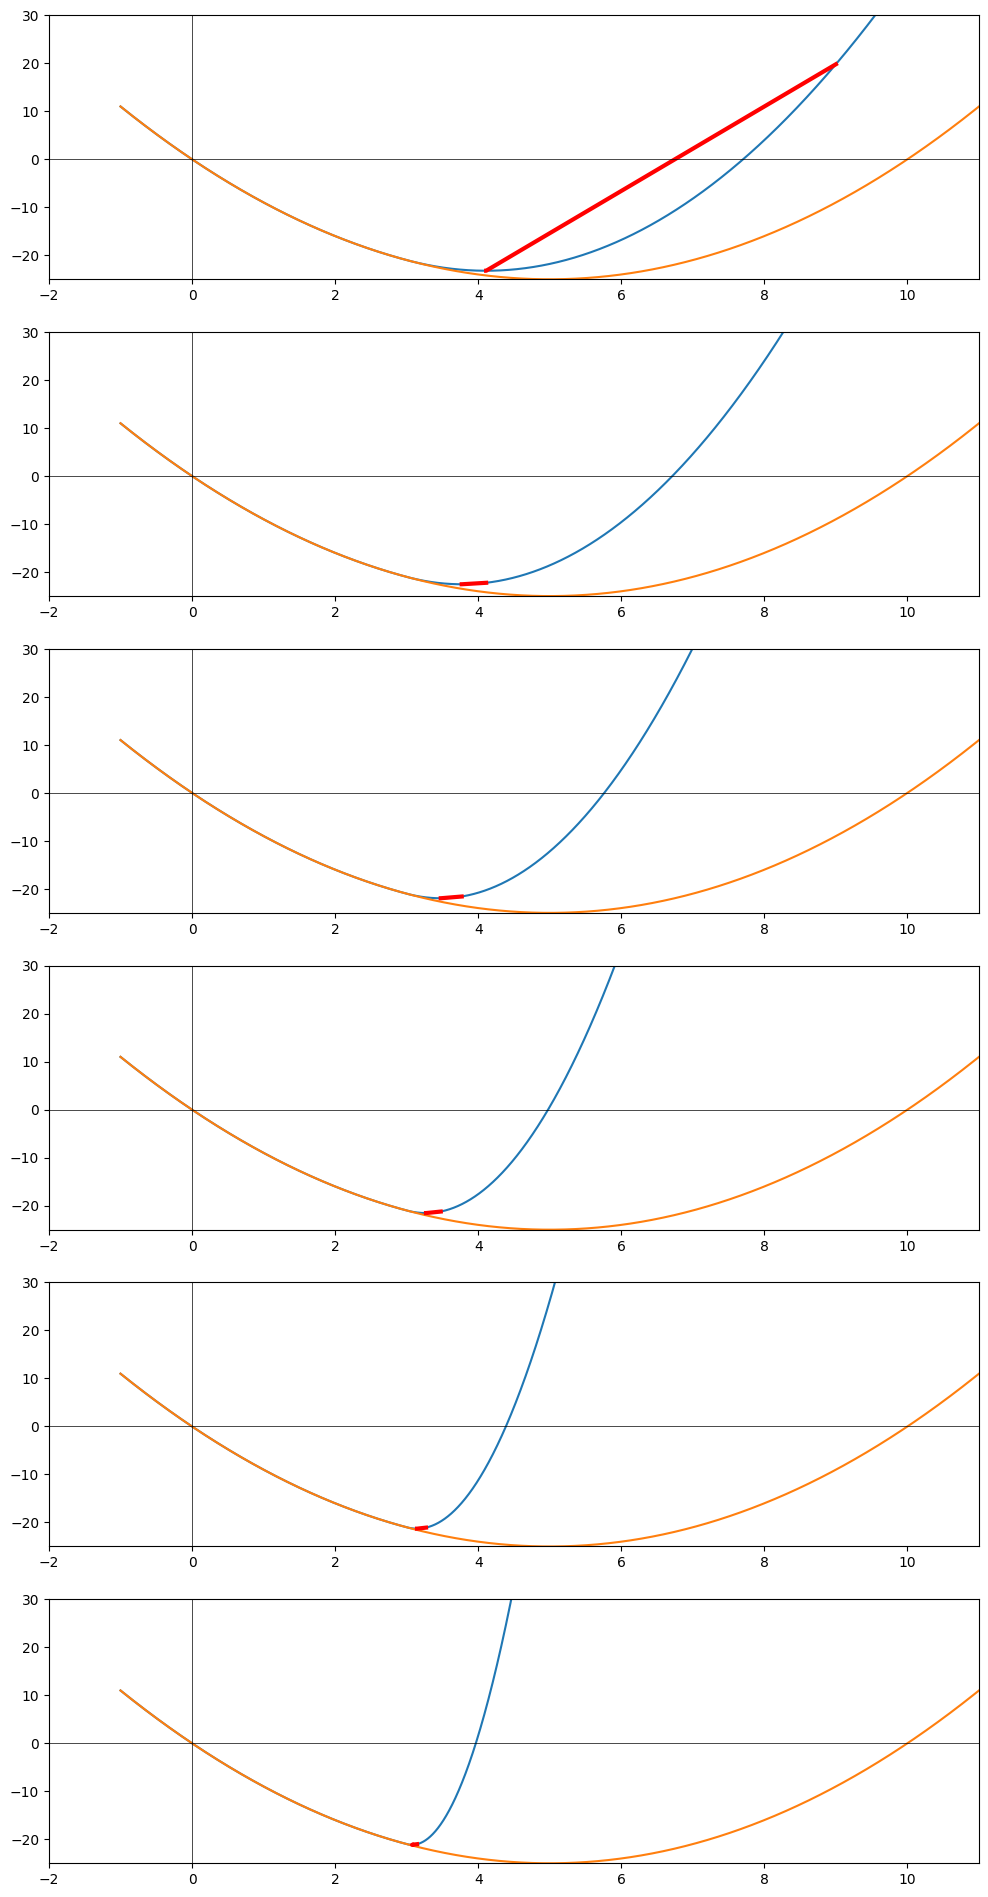

array([3.07518797])

In [88]:
from algorithms import external_penalty_function_method
from matplotlib import pyplot as plt
import numpy as np

EPS = 10e-8
C = 2
RHO_0 = 0.8
X0 = 9

f = lambda x: x**2 - 10*x

INEQUALITY_CONSTRAINTS = [
    lambda x: x-3 # x-3 <= 0
]

EQUALITY_CONSTRAINTS = [
    # lambda x: x # x == 0
]

MAX_ITER = 6
MAX_OPT_ITER = 1000

fig, axs = plt.subplots(MAX_ITER, 1, figsize=(12, 4*MAX_ITER))

def plot_method_step(f, penalty, rho, optimizer_steps, step):
    F = lambda x: f(x) + penalty(x,rho) 
    x = np.linspace(-1,11,10000)
    optimizer_steps_values = [F(opt_step) for opt_step in optimizer_steps]
    ax = axs[step-1]

    ax.plot(x, F(x), label=f'f(x) + {rho}B(x)')
    ax.plot(x, f(x), label='f(x)')
    ax.plot(optimizer_steps, optimizer_steps_values, c='r', linestyle='-', linewidth='3')


    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    ax.set_xlim(-2,11)
    ax.set_ylim(-25,30)


solution = external_penalty_function_method(
    EPS,
    C,
    RHO_0,
    X0,
    INEQUALITY_CONSTRAINTS,
    EQUALITY_CONSTRAINTS,
    f,
    MAX_ITER,
    MAX_OPT_ITER,
    callback=plot_method_step,
)

plt.show()
solution

### Minimum uzyskane klasycznymi metodami

$\large \underset{x}{\text{minimize}}\, (x^2-10x) + \rho ( \max \{0, x-3\} )^{2}\\$

#### Rozważmy jak zachowuje się pochodna funkcji gdy x nie spełnia ograniczeń (funkcja $\max \{0, x-3\} > 0$ czyli $x>3$)


\begin{equation}
    \frac{d}{dx} F(x) = \frac{d}{dx} (f(x) + \rho B(x)) = \frac{d}{dx} f(x) + \frac{d}{dx} \rho B(x) = (2x - 10) + \rho 2(x-3)
\end{equation}

### Teraz szukając ekstremum mamy

\begin{equation}
    (2x - 10) + \rho 2(x-3) = 0
\end{equation}

\begin{equation}
    x = \frac{5+3\rho}{1+\rho} 
\end{equation}

### Biorąc $\rho \rightarrow \infty$ otrzymujemy $\lim_{\rho \to \infty} \frac{5+3\rho}{1+\rho}  = 3$

# Przykład dla funkcji dwóch zmiennych

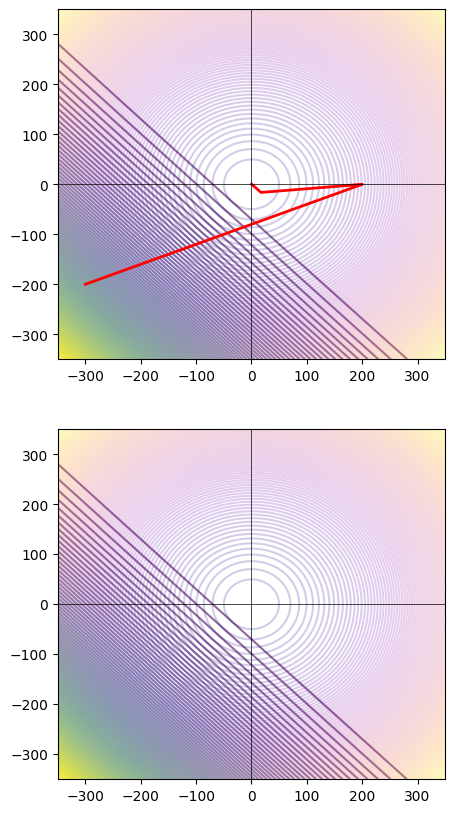

array([0.24999987, 0.24987519])

In [85]:
from algorithms import external_penalty_function_method
from matplotlib import pyplot as plt
import numpy as np

EPS = 10e-8
C = 2
RHO_0 = 500
X0 = np.array([-300,-200])

f = lambda x: 2*x[0]**2 + 2*x[1]**2 # 2x^2 + 2y^2

INEQUALITY_CONSTRAINTS = [
    lambda x: 1 - 2*x[0] - 2*x[1] # 1 - 2*x - 2*y <= 0
]

EQUALITY_CONSTRAINTS = [
    # lambda x: x[0] + x[1]
]

MAX_ITER = 2
MAX_OPT_ITER = 1000

fig, axs = plt.subplots(MAX_ITER, 1, figsize=(5, 5*MAX_ITER))

def plot_method_step(f, penalty, rho, optimizer_steps, step):
    F = lambda x: f(x) + penalty(x,rho)
    ax = axs[step-1]

    x = np.linspace(-350, 350, 1000)
    x, y = np.meshgrid(x, x)
    z = F([x, y])

    levels = np.linspace(np.min(z), np.max(z), 100)

    ax.contour(x, y, z, levels=levels, cmap='viridis', alpha=0.6)
    z = f([x, y])
    levels = np.linspace(np.min(z), np.max(z), 100)
    ax.contour(x, y, z, levels=levels, cmap='plasma', alpha=0.2)

    opt_x = [opt_step[0] for opt_step in optimizer_steps]
    opt_y = [opt_step[1] for opt_step in optimizer_steps]

    ax.plot(opt_x, opt_y, c='r', linestyle='-', linewidth='2')

    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    ax.set_xlim(-350,350)
    ax.set_ylim(-350,350)


solution = external_penalty_function_method(
    EPS,
    C,
    RHO_0,
    X0,
    INEQUALITY_CONSTRAINTS,
    EQUALITY_CONSTRAINTS,
    f,
    MAX_ITER,
    MAX_OPT_ITER,
    callback=plot_method_step,
)

plt.show()
solution

### Podobnie jak dla przykładu funkcji jednej zmiennej możemy zastosować klasyczne metody

#### Przyjmujemy, że $F(x) := (2x_{1}^2 +2x_{2}^2) + \rho ( \max \{0, 1 - 2x_{1} - 2x_{2}\} )^{2}$

### Wyliczając rozwiązania równań, które wynikają z warunków koniecznych istnienia ekstremum mamy:


\begin{equation}
    \begin{cases}
        \Large \frac{\partial F}{\partial x_{1}} = 4x_{1} - 4\rho (1-2x_{1}-2x_{2}) = 0\\
        \Large \frac{\partial F}{\partial x_{2}} = 4x_{2} - 4\rho (1-2x_{1}-2x_{2}) = 0\\
    \end{cases}
    \tag{7}
\end{equation}

\begin{equation}
    \begin{cases}
        \Large \frac{x_{1}}{\rho} = (1-2x_{1}-2x_{2}) = 0\\
        \Large \frac{x_{2}}{\rho} = (1-2x_{1}-2x_{2}) = 0\\
    \end{cases}
    \tag{8}
\end{equation}

### Co daje $(x_{1}, x_{2}) = (\frac{\rho}{4\rho + 1}, \frac{\rho}{4\rho + 1})$
### Biorąc $\rho \rightarrow \infty$ otrzymujemy $\lim_{\rho \to \infty} (\frac{\rho}{4\rho + 1}, \frac{\rho}{4\rho + 1}) = (\frac{1}{4}, \frac{1}{4})$

# Wady i zalety metody

## Zalety 

### 1. Łatwa w zrozumieniu i użyciu. Rozwiązuje problem z ograniczeniami poprzez rozwiązanie problemu bez ograniczeń.
### 2. Radzi sobie z ograniczeniami zadanymi przez równość.
### 3. Złożoność obliczeniowa nie jest wysoka.

## Wady

### 1. Dobór parametru $\rho$ może być problematyczny, przy zbyt duży współczynnik możemy zmierzać do lokalnych minimów.
### 2. Pokazaliśmy, na przykładach, że dokładne minimum osiągane jest dla $\rho$ dążącego do nieskończoności, w algorytmie dostaniemy pewne przybliżenie dla skończonego $\rho$.
### 3. Wzrost $\rho$ może powodować problemy numeryczne.

# Wewnętrzna funkcja kary (Barrier method)

Metodę barierową (metodę wewnętrznej funkcji kary, metoda punktu wewnętrznego) formułuje się głównie dla problemów z ograniczeniami nierównościowymi.

Niech $S := \{x \in \mathbb{R}^n\ \mid g_i(x) \leq 0 , i = 1, \ldots, r\}$. Wymagamy by $int(S) \neq \empty$.

Funkcja $B:int(S)\rightarrow \mathbb{R}$ jest **wewnętrzną funkcją kary** gdy:
- $B(x)$ jest ciągła na wnętrzu $S$
- $B(x) \geq 0$ dla $x \in int(S)$
- $B(x)\rightarrow \infty$ gdy $x$ zbliża się do brzegu $S$ (istnieje $i$, że $g_i(x) \rightarrow 0$)

Nowy problem optymalizacji:

$\phi(x_0,\mu)=\begin{equation}
    \begin{cases}
        \large \underset{x}{\text{minimize}}\, f(x) + \mu B(x)\\
        \large x\in int(S)
    \end{cases}
    \tag{3}
\end{equation}$

$$x_0 \text{ to pierwsze przybliżenie}$$

Często używane wewnętrzne funkcje kary:
- $B(x) = -\sum_{i=1}^{r}\frac{1}{g_i(x)}, \text{ dla } g_i(x) < 0$
- $B(x) = -\sum_{i=1}^{r}log(-{g_i(x)}), \text{ dla } g_i(x) < 0$

# Algorytm dla metody wewnętrznej funkcji kary

## Pseudokod:
1. Niech $x_0 \in int(S),\mu_0 > 0,k=0$
2. Zakończ jeśli $x_k$ jest optymalne według wybranych kryteriów
3. Oblicz $x(\mu_k)$ - rozwiązanie globalne problemu $\phi(x_k, \mu_k)$
4. Przypisz $x_{k+1}:=x(\mu_k)$, wybierz $0 < \mu_{k+1} < \mu_k, k:=k+1$ i wróć do kroku 2.

Wymagamy aby $\mu_k \rightarrow 0$.

# Wady i zalety metody barierowej

## Zalety:
1. Metoda barierowa jest jedną z najlepszych znanych pod względem złożoności czasowej dla rozwiązywania problemów liniowych i problemów wypukłych

## Wady:
1. Dla problemów nieliniowych niewypukłych są znane o wiele lepsze algorytmy
2. Metodę barierową trudno uogólnić na problemy z ograniczeniami równościowymi
3. Punkt startowy metody barierowej musi należeć do wnętrza zbioru rozwiązań dopuszczalnych. W praktyce często trudno znaleźć taki punkt.

# Intuicja dla metody barierowej

Dla ograniczeń

- $g_1(x)=-1-x\leq 0$
- $g_2(x)=x-1 \leq 0$

c:\Users\Jakub\Documents\metody_optymalizacji\demos_barrier.py:14: RuntimeWarning: invalid value encountered in log
  plt.plot(x, y, label='g(x)')


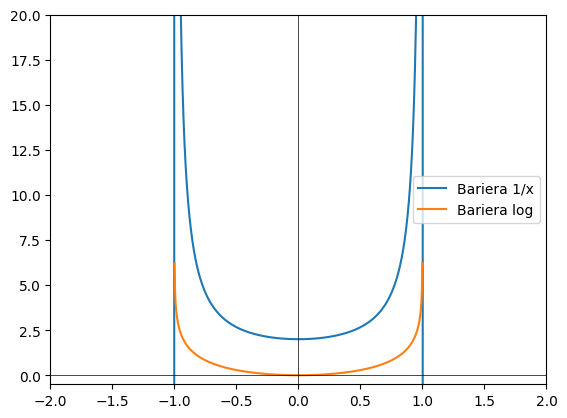

In [35]:
import demos_barrier
demos_barrier.show_barrier_function()

# Przykład metody barierowej

\begin{equation}
    \begin{cases}
        \large \underset{x}{\text{minimize}}\, x\\
        \large 10-x \leq 0\\
        \large x\in\mathbb{R}
    \end{cases}
    \tag{4}
\end{equation}

Bariera:

$$B(x)=\frac{-1}{10-x}$$

Funkcja pomocnicza:

$$\phi(x_0,\mu)=f(x)+\mu B(x)=x-\frac{\mu}{10-x}$$

Punkt krytyczny wyznaczony analitycznie:

$$\frac{\partial \phi_\mu}{\partial x}=10\pm\sqrt{\mu}$$

Co dąży do 10 gdy $\mu\rightarrow 0$.

## Mając na uwadze dwie poprzednie metody, można je połączyć. Jest to tzw. Mixed Barrier-Penalty Function 

### Polega ona na zdefiniowaniu funkcji kary dla nierówności w taki sposób jak ma to miejsce w Barrier method. Dla równości używa się wersji z z Exterior penalty method.

### Przykładowo:

### $LQ(r_{k},x) = f(x) - r_{k}\sum_{i=1}^{n}log(-{g_i(x)}) + \frac{1}{r_{k}}\sum_{j=1}^{m}h(x)_{j}^2$ 
### gdzie $r_{k} \rightarrow 0$

### Da się też pokazać (Fiacco, McCormick), że przy $r_{k} \rightarrow 0$
### $\frac{r_{k}}{g_{i}(x_{k})} \rightarrow \mu_{i}$
### $\frac{2h_{j}(x_{k})}{r_{k}} \rightarrow \lambda_{j} $
### gdzie $\mu_{i}, \lambda_{j}$ to optymalne mnożniki Lagrange'a dla i-tego ograniczenia zadanego przez nierówność i j-tego zadanego przez równość

